### Single body formulation

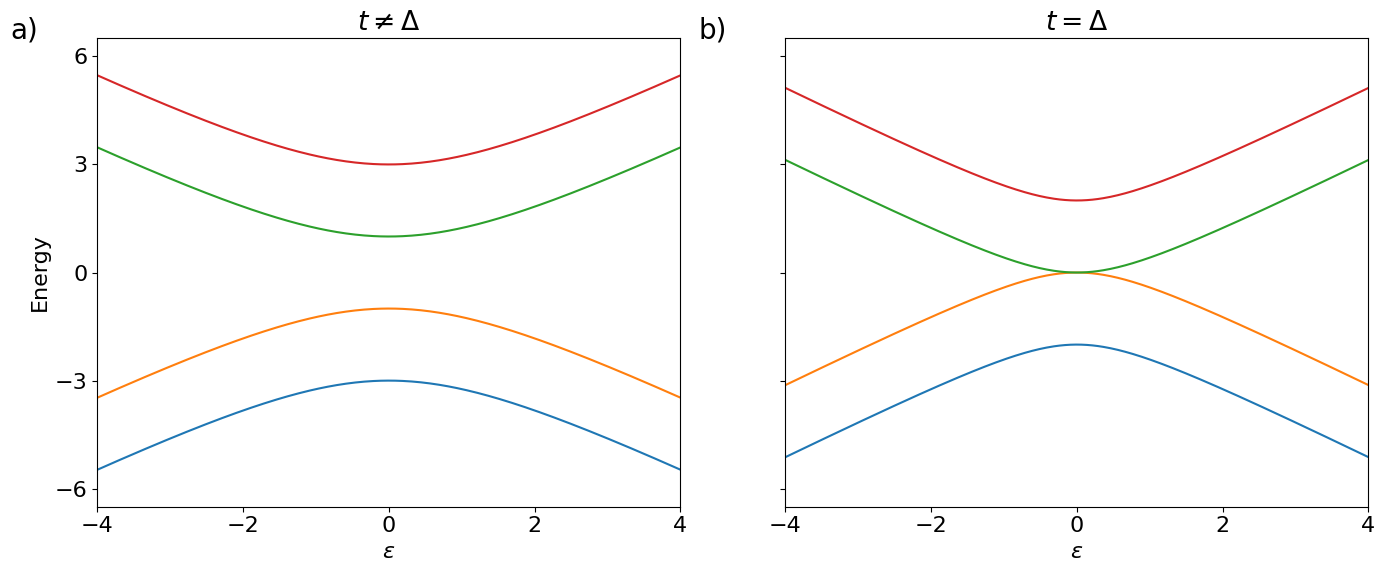

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def hamiltonian(epsilon1, epsilon2, t, Delta):
    """Constructs the 4x4 minimal model Hamiltonian."""
    return np.array([[ epsilon1,    t,        0,      Delta],
                     [      t,   epsilon2,  -Delta,      0],
                     [      0,   -Delta, -epsilon1,     -t],
                     [  Delta,        0,       -t, -epsilon2]])

def compute_eigensystem(epsilon1, epsilon2, t, Delta):
    """Computes and sorts the eigenvalues and eigenvectors of the Hamiltonian."""
    H = hamiltonian(epsilon1, epsilon2, t, Delta)
    eigvals, eigvecs = np.linalg.eig(H)
    idx = np.argsort(eigvals)  # Sort eigenvalues and vectors
    # The eigenvalues of this Hamiltonian are guaranteed to be real
    return np.real(eigvals[idx]), eigvecs[:, idx]

# --- Main Script ---

# Define the two cases for the subplots
cases = [
    {'t': 1, 'delta': 2, 'label': 'a', 'title': r'$t \neq \Delta$'},
    {'t': 1, 'delta': 1, 'label': 'b', 'title': r'$t = \Delta$'}
]

# --- Plotting Setup ---
# Set font size to match the previous figure for consistency
plt.rcParams.update({"font.size": 16})
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Common epsilon values for both plots
epsilon_vals = np.linspace(-5, 5, 400)

# Loop over the two cases and generate each subplot
for ax, case in zip(axes, cases):
    t_val = case['t']
    delta_val = case['delta']
    label = case['label']
    title = case['title']

    # Calculate the energy bands for the current case
    bands = [compute_eigensystem(eps, eps, t_val, delta_val)[0] for eps in epsilon_vals]
    bands = np.array(bands)

    # Plot the four energy bands
    for i in range(bands.shape[1]):
        ax.plot(epsilon_vals, bands[:, i])

    # --- Formatting for each subplot ---
    ax.set_title(title)
    ax.set_xlabel(r'$\varepsilon$')
    ax.set_xlim(-4, 4)
    
    # Add subplot labels a) and b)
    ax.text(-0.15, 1.0, f'{label})', transform=ax.transAxes,
            size=20)
    
    # Set symmetric x-axis ticks to match previous plot style
    ax.set_xticks([-4, -2, 0, 2, 4])


# --- Global Figure Formatting ---
axes[0].set_ylabel('Energy')
axes[0].set_ylim(-6.5, 6.5) # Add a little padding to the view

# Set y-axis ticks as requested
axes[0].set_yticks([-6, -3, 0, 3, 6])

# Adjust layout, save and show the plot
plt.tight_layout()
plt.savefig("figures_minimal/energy_spectrum_static_comparison_polished.pdf")
plt.show()

### Many body formulation

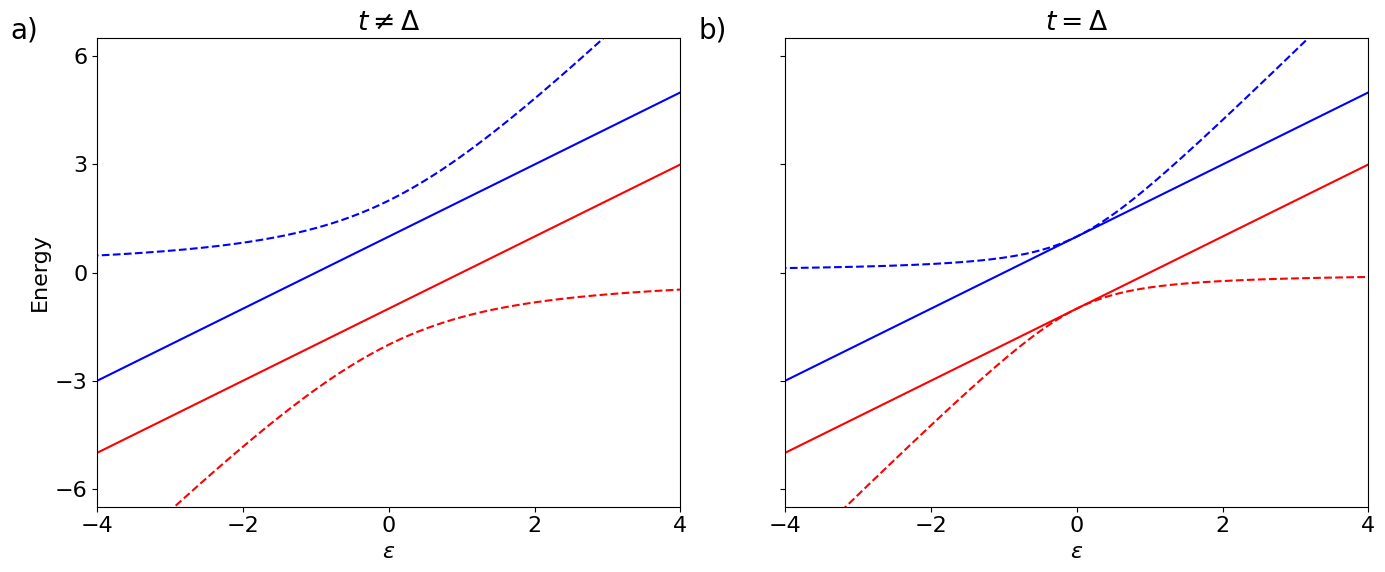

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def many_body_H(epsilon, t, Delta):
    """
    Construct the 4x4 many-body Hamiltonian with ε₁ = ε₂ = ε.
    """
    return np.array([
        [0,           0,           0,           Delta],
        [0,           epsilon,     t,           0    ],
        [0,           t,           epsilon,     0    ],
        [Delta,       0,           0,           2 * epsilon]
    ])

def compute_eigensystem(epsilon, t, Delta):
    """Computes and sorts the eigenvalues and eigenvectors of the Hamiltonian."""
    H = many_body_H(epsilon, t, Delta)
    eigvals, eigvecs = np.linalg.eig(H)
    # Sort eigenvalues in ascending order for consistency
    idx = np.argsort(eigvals)
    return np.real(eigvals[idx]), eigvecs[:, idx]

# --- Main Script ---

# Define the two cases for the subplots
cases = [
    {'t': 1, 'delta': 2, 'label': 'a', 'title': r'$t \neq \Delta$'},
    {'t': 1, 'delta': 1, 'label': 'b', 'title': r'$t = \Delta$'}
]

# --- Plotting Setup ---
# Use consistent, polished styling from previous figures
plt.rcParams.update({"font.size": 16})
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Common epsilon values for both plots
epsilon_vals = np.linspace(-5, 5, 400)

# Loop over the two cases and generate each subplot
for ax, case in zip(axes, cases):
    t_val = case['t']
    delta_val = case['delta']
    label = case['label']
    title = case['title']

    # Calculate the energy bands for the current case
    bands = [compute_eigensystem(eps, t_val, delta_val)[0] for eps in epsilon_vals]
    bands = np.array(bands)

    # Plot the four energy bands with specific styles
    ax.plot(epsilon_vals, bands[:, 0], color='red', linestyle='dashed')
    ax.plot(epsilon_vals, bands[:, 1], color='red')
    ax.plot(epsilon_vals, bands[:, 2], color='blue')
    ax.plot(epsilon_vals, bands[:, 3], color='blue', linestyle='dashed')

    # --- Formatting for each subplot ---
    ax.set_title(title)
    ax.set_xlabel(r'$\varepsilon$')
    ax.set_xlim(-4, 4)

    # Add subplot labels a) and b)
    ax.text(-0.15, 1.0, f'{label})', transform=ax.transAxes,
            size=20)

    # Set symmetric x-axis ticks
    ax.set_xticks([-4, -2, 0, 2, 4])


# --- Global Figure Formatting ---
axes[0].set_ylabel('Energy')
axes[0].set_ylim(-6.5, 6.5)

# Set y-axis ticks as requested for consistency
axes[0].set_yticks([-6, -3, 0, 3, 6])

# Adjust layout, save and show the plot
plt.tight_layout()
plt.savefig("figures_minimal/many_body_spectrum_comparison.pdf")
plt.show()